## a.	Divide the dataset as development and test

In [1]:
# imports here
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import csv
import random
import math
import operator 

In [2]:
# Read CSV file and print data

filename = r'Data/bezdekIris.data'

with open(filename) as csvfile:
    lines = csv.reader(csvfile)
    for row in lines:
        if not row:
                continue
        print (row)

['5.1', '3.5', '1.4', '0.2', 'Iris-setosa']
['4.9', '3.0', '1.4', '0.2', 'Iris-setosa']
['4.7', '3.2', '1.3', '0.2', 'Iris-setosa']
['4.6', '3.1', '1.5', '0.2', 'Iris-setosa']
['5.0', '3.6', '1.4', '0.2', 'Iris-setosa']
['5.4', '3.9', '1.7', '0.4', 'Iris-setosa']
['4.6', '3.4', '1.4', '0.3', 'Iris-setosa']
['5.0', '3.4', '1.5', '0.2', 'Iris-setosa']
['4.4', '2.9', '1.4', '0.2', 'Iris-setosa']
['4.9', '3.1', '1.5', '0.1', 'Iris-setosa']
['5.4', '3.7', '1.5', '0.2', 'Iris-setosa']
['4.8', '3.4', '1.6', '0.2', 'Iris-setosa']
['4.8', '3.0', '1.4', '0.1', 'Iris-setosa']
['4.3', '3.0', '1.1', '0.1', 'Iris-setosa']
['5.8', '4.0', '1.2', '0.2', 'Iris-setosa']
['5.7', '4.4', '1.5', '0.4', 'Iris-setosa']
['5.4', '3.9', '1.3', '0.4', 'Iris-setosa']
['5.1', '3.5', '1.4', '0.3', 'Iris-setosa']
['5.7', '3.8', '1.7', '0.3', 'Iris-setosa']
['5.1', '3.8', '1.5', '0.3', 'Iris-setosa']
['5.4', '3.4', '1.7', '0.2', 'Iris-setosa']
['5.1', '3.7', '1.5', '0.4', 'Iris-setosa']
['4.6', '3.6', '1.0', '0.2', 'Ir

In [3]:
# Divide dataset randomly into development and test datasets

dataset=[]
ratio_factor = 0.58
devSet=[]
testSet=[]

with open(filename, 'r') as csvfile:
        lines = csv.reader(csvfile)
        
        for row in lines:
            if not row:
                continue
            dataset.append(row)
        
        for x in range(len(dataset)):
            for y in range(4):
                dataset[x][y] = float(dataset[x][y])
                
            if random.random() < ratio_factor:
                devSet.append(dataset[x])
            else:
                testSet.append(dataset[x])
                
print ('Length of devSet:')
#print (devSet)
print (len(devSet))

print ('Length of testSet:')
print(len(testSet))

Length of devSet:
82
Length of testSet:
68


## b. Implementing kNN using Distance Metric

#### b. i) Euclidean Distance

In [4]:
# Function to find Euclidean Distance

eu_distances = []

def euclidean_distance(rec1, rec2):
    eu_dist = 0;
    
    for y in range(4):
        eu_dist += pow((rec1[y] - rec2[y]), 2)
        
    eu_dist = math.sqrt(eu_dist)
    eu_distances.append(eu_dist)
    
    return (eu_dist)

#### b. i) Normalized Euclidean Distance

In [5]:
# Function to find Normalized Euclidean Distance

#Reference: chap2_data.pdf by Prof. Deok Gun Park
# mahalanobis(x,y) = (x-y)^T . E^-1 . (x-y)
# E is the covarience matrix

max_eu_distance = 1

def normalized_euclidean_distance(rec1, rec2):
    eu_dist = 0;
    
    for y in range(4):
        eu_dist += pow((rec1[y] - rec2[y]), 2)
    
    eu_dist = math.sqrt(eu_dist)
    
    norm_eu_dist = float(eu_dist)/max_eu_distance
    
    return (norm_eu_dist)

#### b. iii) Cosine Similarity

In [6]:
# Function to find Cosine Similarity

def cosine_similarity(rec1, rec2):
    inner_product = 0;
    len_d1 = 0
    len_d2 = 0
    
    for y in range(4):
        inner_product += rec1[y] * rec2[y]
        len_d1 += pow(rec1[y],2)
        len_d2 += pow(rec2[y],2)
        
    den = math.sqrt(len_d1 * len_d2)
    cosim = inner_product / den
    
    return (cosim)

#### b. iv) Implementing kNN

In [7]:
# Function to find neighbors using Euclidean Distance

def checkEuNeighbors(dm,check_rec, k):
    euclidean_distances = []
    euNeighbors = []
    
    for x in range(len(devSet)):
        if (devSet[x] == check_rec):
            continue
        
        if(dm == 'e'):
            eu_dist = euclidean_distance(devSet[x], check_rec)
            euclidean_distances.append((devSet[x], eu_dist))
            euclidean_distances.sort(key=operator.itemgetter(1), reverse=False)
        if(dm == 'n'):
            eu_dist = normalized_euclidean_distance(devSet[x], check_rec)
            euclidean_distances.append((devSet[x], eu_dist))
            euclidean_distances.sort(key=operator.itemgetter(1), reverse=False)
        if(dm == 'c'):
            eu_dist = cosine_similarity(devSet[x], check_rec)
            euclidean_distances.append((devSet[x], eu_dist))
            euclidean_distances.sort(key=operator.itemgetter(1), reverse=True)
    
    #print(euclidean_distances)
    
    for y in range(k):
        euNeighbors.append(euclidean_distances[y][0])
        
    return euNeighbors;

In [8]:
# Function to predict the class using Euclidean Distance

def classPredictionUsingEuDist(dm, check_rec, k):    
    euNeighbors = checkEuNeighbors(dm,check_rec, k)
    result = [rec[-1] for rec in euNeighbors]
    predict = max(set(result), key=result.count)
    return predict

In [9]:
# kNN Algorithm using Euclidean Distance
def calculateEukNN(dm, testDataSet ,k):
    predictions = []
    
    for x in range(len(testDataSet)):
        
        prediction = classPredictionUsingEuDist(dm,testDataSet[x], k)
        predictions.append(prediction)
        
        #print(repr(devSet[x]) + '=' + repr(prediction))
        
    return(predictions)

In [10]:
# Predictions using Euclidean Distance

# Predictions for k = 1
euPredictions1 = []
euPredictions1 = calculateEukNN('e', devSet ,1)

# Predictions for k = 3
euPredictions3 = []
euPredictions3 = calculateEukNN('e', devSet ,3)

# Predictions for k = 5
euPredictions5 = []
euPredictions5 = calculateEukNN('e', devSet ,5)

# Predictions for k = 7
euPredictions7 = []
euPredictions7 = calculateEukNN('e', devSet ,7)

In [11]:
# Calculate max euclidean distance to use in normalization

max_eu_distance = max(eu_distances)

In [12]:
# Predictions using Normalized Euclidean Distance

# Predictions for k = 1
neuPredictions1 = []
neuPredictions1 = calculateEukNN('n', devSet ,1)

# Predictions for k = 3
neuPredictions3 = []
neuPredictions3 = calculateEukNN('n', devSet ,3)

# Predictions for k = 5
neuPredictions5 = []
neuPredictions5 = calculateEukNN('n', devSet ,5)

# Predictions for k = 7
neuPredictions7 = []
neuPredictions7 = calculateEukNN('n', devSet ,7)

In [13]:
# Predictions using Cosine Similarity

# Predictions for k = 1
cosPredictions1 = []
cosPredictions1 = calculateEukNN('c', devSet ,1)

# Predictions for k = 3
cosPredictions3 = []
cosPredictions3 = calculateEukNN('c', devSet ,3)

# Predictions for k = 5
cosPredictions5 = []
cosPredictions5 = calculateEukNN('c', devSet ,5)

# Predictions for k = 7
cosPredictions7 = []
cosPredictions7 = calculateEukNN('c', devSet ,7)

## C. Operations on Development Dataset

#### c. i) Calculate Accuracy using development dataset

In [14]:
# Function to find the accuracy using predictions

def calculateAccuracy(testDataSet, predictions):
    count = 0
    for x in range(len(testDataSet)):
        if testDataSet[x][-1] == predictions[x]:
            count += 1
            
    accuracy = (count/float(len(testDataSet))) * 100.0
    return accuracy

In [15]:
# Calculate accuracy for devSet using Euclidean Distance
# for k = 1,3,5,7

euAccuracy1 = calculateAccuracy(devSet, euPredictions1)
euAccuracy3 = calculateAccuracy(devSet, euPredictions3)
euAccuracy5 = calculateAccuracy(devSet, euPredictions5)
euAccuracy7 = calculateAccuracy(devSet, euPredictions7)

print(euAccuracy1)
print(euAccuracy3)
print(euAccuracy5)
print(euAccuracy7)

96.34146341463415
97.5609756097561
96.34146341463415
97.5609756097561


In [16]:
# Calculate accuracy for devSet using Euclidean Distance
# for k = 1,3,5,7

neuAccuracy1 = calculateAccuracy(devSet, neuPredictions1)
neuAccuracy3 = calculateAccuracy(devSet, neuPredictions3)
neuAccuracy5 = calculateAccuracy(devSet, neuPredictions5)
neuAccuracy7 = calculateAccuracy(devSet, neuPredictions7)

print(neuAccuracy1)
print(neuAccuracy3)
print(neuAccuracy5)
print(neuAccuracy7)

96.34146341463415
97.5609756097561
96.34146341463415
97.5609756097561


In [17]:
# Calculate accuracy for devSet using Cosine Similarity
# for k = 1,3,5,7

cosAccuracy1 = calculateAccuracy(devSet, cosPredictions1)
cosAccuracy3 = calculateAccuracy(devSet, cosPredictions3)
cosAccuracy5 = calculateAccuracy(devSet, cosPredictions5)
cosAccuracy7 = calculateAccuracy(devSet, cosPredictions7)

print(cosAccuracy1)
print(cosAccuracy3)
print(cosAccuracy5)
print(cosAccuracy7)

96.34146341463415
95.1219512195122
95.1219512195122
96.34146341463415


#### c. ii) Find optimal hyperparameters which give maximum accuracy

In [18]:
# Find optimal hyperparameters which give maximum accuracy

accuracies = []

accuracies.append(['Euclidean Distance',"k=1",euAccuracy1])
accuracies.append(['Euclidean Distance',"k=3",euAccuracy3])
accuracies.append(['Euclidean Distance',"k=5",euAccuracy5])
accuracies.append(['Euclidean Distance',"k=7",euAccuracy7])

accuracies.append(['Normalized Euclidean Distance',"k=1",neuAccuracy1])
accuracies.append(['Normalized Euclidean Distance',"k=3",neuAccuracy3])
accuracies.append(['Normalized Euclidean Distance',"k=5",neuAccuracy5])
accuracies.append(['Normalized Euclidean Distance',"k=7",neuAccuracy7])

accuracies.append(['Cosine Similarity',"k=1",cosAccuracy1])
accuracies.append(['Cosine Similarity',"k=3",cosAccuracy3])
accuracies.append(['Cosine Similarity',"k=5",cosAccuracy5])
accuracies.append(['Cosine Similarity',"k=7",cosAccuracy7])

accuracies.sort(key=operator.itemgetter(2), reverse=True)
max_accuracy = accuracies[0][2]
print('Optimal hyperparameters which give maximum accuracy:')
print(accuracies[0])

accuracies.sort(key=operator.itemgetter(2), reverse=False)
min_accuracy = accuracies[0][2]

Optimal hyperparameters which give maximum accuracy:
['Euclidean Distance', 'k=3', 97.5609756097561]


#### c. iii) Draw bar charts for accuracy

[(94.1219512195122, 97.5609756097561)]

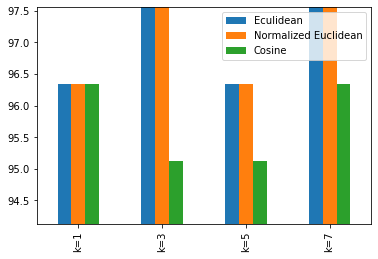

In [19]:
euAc = [euAccuracy1, euAccuracy3, euAccuracy5, euAccuracy7]
neuAc = [neuAccuracy1, neuAccuracy3, neuAccuracy5, neuAccuracy7]
cosAc = [cosAccuracy1, cosAccuracy3, cosAccuracy5, cosAccuracy7]
kVal = ['k=1', 'k=3', 'k=5', 'k=7']

df = pd.DataFrame({'Eculidean': euAc, 'Normalized Euclidean': neuAc, 'Cosine': cosAc}, index=kVal)

ax = df.plot.bar()
ax.set(ylim=[min_accuracy-1, max_accuracy])

## d. Calculate final accuracy for Test Dataset

In [20]:
# Predictions using Euclidean Distance

# Predictions for k = 1
euPredictionstestSet1 = []
euPredictionstestSet1 = calculateEukNN('e', testSet ,1)

# Predictions for k = 3
euPredictionstestSet3 = []
euPredictionstestSet3 = calculateEukNN('e', testSet ,3)

# Predictions for k = 5
euPredictionstestSet5 = []
euPredictionstestSet5 = calculateEukNN('e', testSet ,5)

# Predictions for k = 7
euPredictionstestSet7 = []
euPredictionstestSet7 = calculateEukNN('e', testSet ,7)

In [21]:
# Predictions using Normalized Euclidean Distance

# Predictions for k = 1
neuPredictionstestSet1 = []
neuPredictionstestSet1 = calculateEukNN('n', testSet ,1)

# Predictions for k = 3
neuPredictionstestSet3 = []
neuPredictionstestSet3 = calculateEukNN('n', testSet ,3)

# Predictions for k = 5
neuPredictionstestSet5 = []
neuPredictionstestSet5 = calculateEukNN('n', testSet ,5)

# Predictions for k = 7
neuPredictionstestSet7 = []
neuPredictionstestSet7 = calculateEukNN('n', testSet ,7)

In [22]:
# Predictions using Cosine Similarity

# Predictions for k = 1
cosPredictionstestSet1 = []
cosPredictionstestSet1 = calculateEukNN('c', testSet ,1)

# Predictions for k = 3
cosPredictionstestSet3 = []
cosPredictionstestSet3 = calculateEukNN('c', testSet ,3)

# Predictions for k = 5
cosPredictionstestSet5 = []
cosPredictionstestSet5 = calculateEukNN('c', testSet ,5)

# Predictions for k = 7
cosPredictionsv7 = []
cosPredictionstestSet7 = calculateEukNN('c', testSet ,7)

In [23]:
# Calculate accuracy for testSet using Euclidean Distance
# for k = 1,3,5,7

euAccuracytestSet1 = calculateAccuracy(testSet, euPredictionstestSet1)
euAccuracytestSet3 = calculateAccuracy(testSet, euPredictionstestSet3)
euAccuracytestSet5 = calculateAccuracy(testSet, euPredictionstestSet5)
euAccuracytestSet7 = calculateAccuracy(testSet, euPredictionstestSet7)

print(euAccuracytestSet1)
print(euAccuracytestSet3)
print(euAccuracytestSet5)
print(euAccuracytestSet7)

94.11764705882352
95.58823529411765
95.58823529411765
95.58823529411765


In [24]:
# Calculate accuracy for testSet using Euclidean Distance
# for k = 1,3,5,7

neuAccuracytestSet1 = calculateAccuracy(testSet, neuPredictionstestSet1)
neuAccuracytestSet3 = calculateAccuracy(testSet, neuPredictionstestSet3)
neuAccuracytestSet5 = calculateAccuracy(testSet, neuPredictionstestSet5)
neuAccuracytestSet7 = calculateAccuracy(testSet, neuPredictionstestSet7)

print(neuAccuracytestSet1)
print(neuAccuracytestSet3)
print(neuAccuracytestSet5)
print(neuAccuracytestSet7)

94.11764705882352
95.58823529411765
95.58823529411765
95.58823529411765


In [25]:
# Calculate accuracy for testSet using Cosine Similarity
# for k = 1,3,5,7

cosAccuracytestSet1 = calculateAccuracy(testSet, cosPredictionstestSet1)
cosAccuracytestSet3 = calculateAccuracy(testSet, cosPredictionstestSet3)
cosAccuracytestSet5 = calculateAccuracy(testSet, cosPredictionstestSet5)
cosAccuracytestSet7 = calculateAccuracy(testSet, cosPredictionstestSet7)

print(cosAccuracytestSet1)
print(cosAccuracytestSet3)
print(cosAccuracytestSet5)
print(cosAccuracytestSet7)

98.52941176470588
98.52941176470588
97.05882352941177
95.58823529411765
